In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross/tt_cross")

In [3]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from src.utils.functions import *
from src.regular_tt_cross.dmrg_cross import *
from src.quantic_tt_cross.interpolators_1D import *

# N-Dimensional interpolator

In [3]:
# grid_creation
num_var = 40
subdivision = 25
temp = [np.linspace(0.5, 2, subdivision) for _ in range(num_var)]
grid = np.array(temp)
grid

array([[0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.93

In [5]:
# interpolator initialization

example_interpolator = greedy_cross(
    func=lambda x: np.sinc(np.sum(x)),
    num_variables=num_var,
    grid=grid,
    tol=1e-10,
    max_bond=5,
    sweeps=3,
    is_f_complex=False,
)

Initialization done after time: 0.0036411285400390625 seconds and 1 tries.


In [6]:
example_interpolator._create_initial_index_sets()
example_interpolator.i

array([array([[1.]]), array([[0.5]]), array([[0.5, 0.5]]),
       array([[0.5, 0.5, 0.5]]), array([[0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
               0.5]])                                                          ,
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
               0.5, 0.5]])                                           

In [7]:
len(example_interpolator.j[0][0])

39

In [8]:
example_interpolator._create_initial_bonds()
example_interpolator.compute_single_site_tensor(2)

array([[[-3.89817183e-17],
        [ 3.09528614e-03],
        [ 6.05276620e-03],
        [ 8.76004942e-03],
        [ 1.11150162e-02],
        [ 1.30296614e-02],
        [ 1.44333737e-02],
        [ 1.52755303e-02],
        [ 1.55273115e-02],
        [ 1.51826700e-02],
        [ 1.42584237e-02],
        [ 1.27934742e-02],
        [ 1.08471845e-02],
        [ 8.49698487e-03],
        [ 5.83530155e-03],
        [ 2.96593090e-03],
        [-1.48689429e-17],
        [-2.94832894e-03],
        [-5.76624472e-03],
        [-8.34659576e-03],
        [-1.05919567e-02],
        [-1.24182990e-02],
        [-1.37581281e-02],
        [-1.45629691e-02],
        [-1.48051110e-02]]])

In [9]:
example_interpolator.index_update(5)

In [10]:
example_interpolator.i[6]

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 1. ]])

In [11]:
example_interpolator.bonds

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
example_interpolator = greedy_cross(
    func=slater, num_variables=num_var, grid=grid, tol=1e-10, max_bond=10, sweeps=6, is_f_complex=False
)

tensors = example_interpolator.run()

Initialization done after time: 0.0010387897491455078 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5


In [14]:
print("Time spent to do the whole computation =", example_interpolator.total_time, "s")
print("Time spent building superblock tensors =", example_interpolator.super_block_time, "s")

Time spent to do the whole computation = 83.4869749546051 s
Time spent building superblock tensors = 82.07739996910095 s


In [15]:
for t in tensors:
    print(t.shape)

(1, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 5)
(5, 5)
(5, 25, 1)


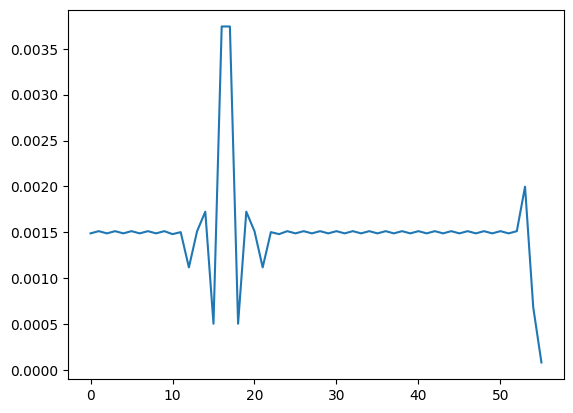

In [13]:
# This error corresponds to np.sum(np.abs(superblock-superblock_approx)) at each pivot finding step

plt.plot(example_interpolator.error[100:])

In [14]:
for i in range(num_var - 1):
    print(np.concatenate((example_interpolator.i[i + 1], example_interpolator.j[i]), axis=1))
    print(np.concatenate((example_interpolator.i[i + 1], example_interpolator.j[i]), axis=1).shape)
    print("==============================")

[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5]
 [2.0 2.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5]
 [1.3125 1.375 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5]]
(3, 40)
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5]
 [2.0 1.1875 2.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5]
 [0.5 1.375 2.0 1.5 2.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  

## 1D Interpolator


In [18]:
def test_func(x):
    B = 2 ** (-30)
    return np.cos(x / B) * np.cos(x / (4 * np.sqrt(5) * B)) * np.exp(-(x**2)) + 2 * np.exp(-x)

In [19]:
interval = [0, 2 ** (-23)]
d = 15

test_interpolator = greedy_one_dim_func_interpolator(
    func=test_func,
    interval=interval,
    d=d,
    complex_function=False,
)

In [20]:
test_interpolator.func_from_binary([0 for _ in range(3)])

2.9999980688065233

In [22]:
test_interpolator.h

3.637978807091713e-12

In [23]:
test_interpolator.interpolate(
    max_bond=5,
    pivot_finder_tol=1e-8,
    sweeps=5,
)

Initialization done after time: 0.0009205341339111328 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3


In [24]:
for i in test_interpolator.interpolator.i:
    print(i)
    print("-----")

[[1.]]
-----
[[0.0]
 [1.0]]
-----
[[0.0 0.0]
 [1.0 1.0]
 [0.0 1.0]
 [1.0 0.0]]
-----
[[0.0 0.0 0.0]
 [1.0 1.0 1.0]
 [1.0 1.0 0.0]
 [1.0 0.0 0.0]
 [0.0 0.0 1.0]]
-----
[[0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0]
 [1.0 1.0 1.0 0.0]
 [1.0 0.0 0.0 1.0]
 [1.0 1.0 0.0 0.0]]
-----
[[0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 1.0 0.0]
 [1.0 1.0 1.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 1.0]]
-----
[[0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 1.0]]
-----
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0]]
-----
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0]]
-----
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 [0.0 

In [25]:
for tensor in test_interpolator.interpolation:
    print(tensor.shape)

(1, 2, 2)
(2, 2)
(2, 2, 4)
(4, 4)
(4, 2, 5)
(5, 5)
(5, 2, 5)
(5, 5)
(5, 2, 5)
(5, 5)
(5, 2, 5)
(5, 5)
(5, 2, 5)
(5, 5)
(5, 2, 5)
(5, 5)
(5, 2, 5)
(5, 5)
(5, 2, 5)
(5, 5)
(5, 2, 4)
(4, 4)
(4, 2, 4)
(4, 4)
(4, 2, 3)
(3, 3)
(3, 2, 2)
(2, 2)
(2, 2, 1)


<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_1676/1265960053.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Plot of $\cos(x / 2^{-30})\cos(x / (4\sqrt{5}2^{-30}))e^{-x^2} + 2e^{-x}$")


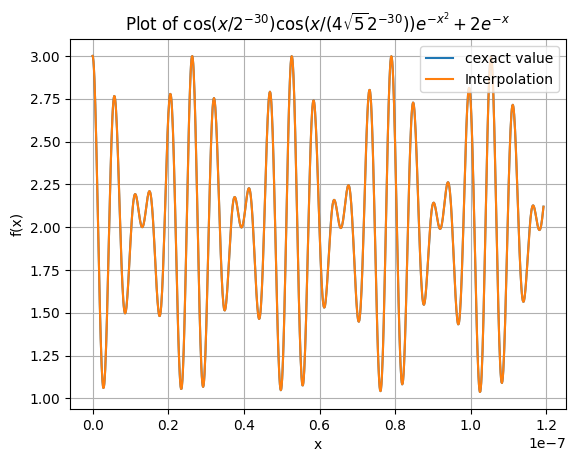

In [31]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 ** (-23), 1000)

y = [test_func(x_i) for x_i in x]

interpolation = np.array([test_interpolator.eval(x_i) for x_i in x])

plt.plot(x, y, label="cexact value")
plt.plot(x, interpolation, label="Interpolation")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of $\cos(x / 2^{-30})\cos(x / (4\sqrt{5}2^{-30}))e^{-x^2} + 2e^{-x}$")
plt.legend()
plt.grid(True)
plt.show()

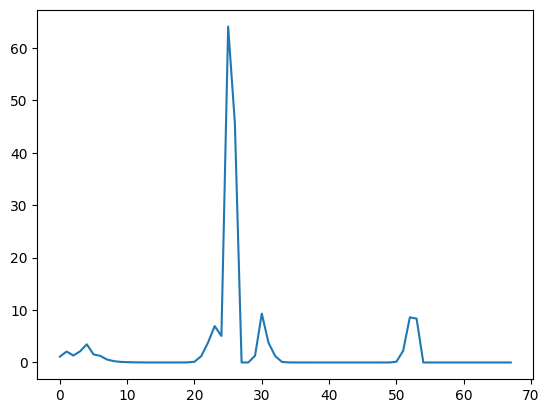

In [32]:
plt.plot(test_interpolator.interpolator.error)

In [33]:
for i in range(test_interpolator.d - 1):
    print(np.concatenate((test_interpolator.interpolator.i[i + 1], test_interpolator.interpolator.j[i]), axis=1))
    print("==============================")

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]]
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.